# NFL Big Data Bowl 2021 Data Exploration

This notebook explores the dataset given in the [NFL Big Data Bowl 2021 Kaggle competition](https://www.kaggle.com/c/nfl-big-data-bowl-2021/overview). The dataset used is NFL’s Next Gen Stats 2018 data, which includes comprehensive information on all plays and players for the entire 2018 season.

## Import the libraries

In [49]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import IPython
from IPython.display import display
import sklearn
import seaborn as sns

# Pandas options
pd.set_option("display.precision", 2)
pd.set_option('display.max_columns', None)

# Seaborn options
sns.set_theme()

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [74]:
nfl_cleaned_class = nfl_cleaned_class.drop(columns=['epa'])

Finally, split the data for training and testing

In [75]:
from sklearn.model_selection import train_test_split

X = nfl_cleaned_class.drop(columns=['passResult'])
y = nfl_cleaned_class['passResult'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [76]:
list(X_train.columns)

['quarter',
 'down',
 'yardsToGo',
 'defendersInTheBox',
 'numberOfPassRushers',
 'preSnapVisitorScore',
 'preSnapHomeScore',
 'absoluteYardlineNumber',
 'isDefensivePI',
 'under2mins',
 'offenseFormation_I_FORM',
 'offenseFormation_SINGLEBACK',
 'offenseFormation_SHOTGUN',
 'offenseFormation_EMPTY',
 'offenseFormation_PISTOL',
 'offenseFormation_WILDCAT',
 'offenseFormation_JUMBO',
 'personnelO_2 RB, 1 TE, 2 WR',
 'personnelO_1 RB, 1 TE, 3 WR',
 'personnelO_2 RB, 3 TE, 0 WR',
 'personnelO_1 RB, 2 TE, 2 WR',
 'personnelO_1 RB, 3 TE, 1 WR',
 'personnelO_2 RB, 0 TE, 3 WR',
 'personnelO_2 RB, 2 TE, 1 WR',
 'personnelO_0 RB, 1 TE, 4 WR',
 'personnelO_6 OL, 1 RB, 1 TE, 2 WR',
 'personnelO_1 RB, 0 TE, 4 WR',
 'personnelO_6 OL, 1 RB, 2 TE, 1 WR',
 'personnelO_1 RB, 1 TE, 2 WR,1 DL',
 'personnelO_2 QB, 0 RB, 1 TE, 3 WR',
 'personnelO_2 QB, 1 RB, 1 TE, 2 WR',
 'personnelO_6 OL, 2 RB, 0 TE, 2 WR',
 'personnelO_6 OL, 2 RB, 2 TE, 0 WR',
 'personnelO_3 RB, 1 TE, 1 WR',
 'personnelO_0 RB, 2 TE, 3 WR

In [77]:
X_train.head()

,quarter,down,yardsToGo,defendersInTheBox,numberOfPassRushers,preSnapVisitorScore,preSnapHomeScore,absoluteYardlineNumber,isDefensivePI,under2mins,offenseFormation_I_FORM,offenseFormation_SINGLEBACK,offenseFormation_SHOTGUN,offenseFormation_EMPTY,offenseFormation_PISTOL,offenseFormation_WILDCAT,offenseFormation_JUMBO,"personnelO_2 RB, 1 TE, 2 WR","personnelO_1 RB, 1 TE, 3 WR","personnelO_2 RB, 3 TE, 0 WR","personnelO_1 RB, 2 TE, 2 WR","personnelO_1 RB, 3 TE, 1 WR","personnelO_2 RB, 0 TE, 3 WR","personnelO_2 RB, 2 TE, 1 WR","personnelO_0 RB, 1 TE, 4 WR","personnelO_6 OL, 1 RB, 1 TE, 2 WR","personnelO_1 RB, 0 TE, 4 WR","personnelO_6 OL, 1 RB, 2 TE, 1 WR","personnelO_1 RB, 1 TE, 2 WR,1 DL","personnelO_2 QB, 0 RB, 1 TE, 3 WR","personnelO_2 QB, 1 RB, 1 TE, 2 WR","personnelO_6 OL, 2 RB, 0 TE, 2 WR","personnelO_6 OL, 2 RB, 2 TE, 0 WR","personnelO_3 RB, 1 TE, 1 WR","personnelO_0 RB, 2 TE, 3 WR","personnelO_1 RB, 2 TE, 1 WR,1 DL","personnelO_6 OL, 1 RB, 3 TE, 0 WR","personnelO_6 OL, 2 RB, 1 TE, 1 WR","personnelO_0 RB, 2 TE, 0 WR,1 P,3 LB,1 LS,4 DB","personnelO_3 RB, 2 TE, 0 WR","personnelO_6 OL, 1 RB, 2 TE, 0 WR,1 DL","personnelO_1 RB, 0 TE, 3 WR,1 DL","personnelO_6 OL, 0 RB, 1 TE, 0 WR,1 P,1 LS,1 DL,1 K","personnelO_1 RB, 1 TE, 2 WR,1 P,3 LB,1 LS,2 DB","personnelO_0 RB, 3 TE, 2 WR","personnelO_1 RB, 0 TE, 0 WR,1 P,4 LB,1 LS,3 DB","personnelO_1 RB, 4 TE, 0 WR","personnelO_6 OL, 1 RB, 1 TE, 1 WR,1 DL","personnelO_2 QB, 1 RB, 2 TE, 1 WR","personnelO_6 OL, 1 RB, 0 TE, 3 WR","personnelO_2 QB, 2 RB, 2 TE, 0 WR","personnelO_3 RB, 0 TE, 2 WR","personnelO_2 QB, 1 RB, 1 TE, 1 WR,1 DL","personnelO_1 RB, 0 TE, 0 WR,1 P,3 LB,1 LS,1 DL,4 DB","personnelO_2 QB, 2 RB, 1 TE, 1 WR","personnelO_2 RB, 2 TE, 0 WR,1 P,3 LB,1 LS,2 DB","personnelO_1 RB, 2 TE, 1 WR,1 DB","personnelO_4 RB, 1 TE, 0 WR","personnelO_0 RB, 1 TE, 0 WR,1 P,1 LS,2 DL,1 K","personnelO_1 RB, 1 TE, 1 WR,1 P,4 LB,1 LS,1 DL,1 DB","personnelO_1 RB, 0 TE, 3 WR,1 DB","personnelO_1 RB, 2 TE, 1 WR,1 P,4 LB,1 LS,1 DB","personnelO_1 RB, 1 TE, 2 WR","personnelO_0 RB, 2 TE, 0 WR,1 P,1 LS,1 DL,1 K","personnelO_0 RB, 0 TE, 5 WR","personnelO_1 RB, 1 TE, 2 WR,1 DB","personnelO_1 RB, 2 TE, 1 WR,1 P,2 LB,1 LS,3 DB","personnelO_6 OL, 2 RB, 1 TE, 0 WR,1 DL","personnelO_0 RB, 1 TE, 0 WR,1 P,3 LB,1 LS,1 DL,4 DB","personnelO_6 OL, 0 RB, 0 TE, 0 WR,4 DL","personnelO_2 QB, 1 RB, 0 TE, 3 WR","personnelO_0 RB, 1 TE, 1 WR,1 P,3 LB,1 LS,1 DL,3 DB","personnelO_7 OL, 0 RB, 1 TE, 0 WR,1 P,1 LS,1 K","personnelD_4 DL, 2 LB, 5 DB","personnelD_4 DL, 1 LB, 6 DB","personnelD_6 DL, 3 LB, 2 DB","personnelD_3 DL, 3 LB, 5 DB","personnelD_4 DL, 3 LB, 4 DB","personnelD_3 DL, 4 LB, 4 DB","personnelD_2 DL, 3 LB, 6 DB","personnelD_2 DL, 4 LB, 5 DB","personnelD_3 DL, 2 LB, 6 DB","personnelD_1 DL, 5 LB, 5 DB","personnelD_5 DL, 1 LB, 5 DB","personnelD_0 DL, 6 LB, 5 DB","personnelD_1 DL, 4 LB, 6 DB","personnelD_3 DL, 1 LB, 7 DB","personnelD_3 DL, 1 LB, 6 DB, 1 TE","personnelD_4 DL, 4 LB, 3 DB","personnelD_5 DL, 3 LB, 3 DB","personnelD_0 DL, 5 LB, 6 DB","personnelD_1 DL, 3 LB, 7 DB","personnelD_5 DL, 2 LB, 4 DB","personnelD_1 DL, 4 LB, 5 DB","personnelD_6 DL, 4 LB, 1 DB","personnelD_2 DL, 2 LB, 7 DB","personnelD_3 DL, 5 LB, 3 DB","personnelD_0 DL, 3 LB, 4 DB, 3 RB,1 QB","personnelD_3 DL, 2 LB, 5 DB, 1 WR","personnelD_3 DL, 2 LB, 5 DB","personnelD_5 DL, 4 LB, 2 DB","personnelD_0 DL, 4 LB, 7 DB","personnelD_4 DL, 2 LB, 4 DB","personnelD_6 DL, 1 LB, 4 DB","personnelD_4 DL, 3 LB, 3 DB, 1 WR","personnelD_4 DL, 5 LB, 2 DB","personnelD_2 DL, 2 LB, 6 DB, 1 WR","personnelD_2 DL, 3 LB, 5 DB","personnelD_0 DL, 4 LB, 4 DB, 1 RB,2 WR","personnelD_6 DL, 2 LB, 3 DB","personnelD_5 DL, 3 LB, 2 DB, 1 OL","personnelD_2 DL, 3 LB, 5 DB, 1 WR","personnelD_4 DL, 0 LB, 7 DB","personnelD_3 DL, 1 LB, 6 DB, 1 WR","personnelD_3 DL, 0 LB, 8 DB","personnelD_1 DL, 3 LB, 5 DB, 1 TE,1 WR","personnelD_1 DL, 4 LB, 3 DB, 1 RB,2 WR","personnelD_2 DL, 4 LB, 4 DB","personnelD_0 DL, 4 LB, 4 DB, 1 TE,2 WR","personnelD_0 DL, 2 LB, 4 DB, 3 RB,2 WR","personnelD_4 DL, 4 LB, 2 DB","

Define a utility function to print off various metrics

In [79]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def print_scores(pred, expected):
    print('Summary')
    print('-'*30)
    print(f'Accuracy: {accuracy_score(pred, expected)}')
    print(f'Precision: {precision_score(pred, expected, average="weighted")}')
    print(f'Recall: {recall_score(pred, expected, average="weighted")}')
    print(f'F1-Score: {f1_score(pred, expected, average="weighted")}')

Import necessary functions for classifying and do some initialization

In [80]:
from sklearn.model_selection import cross_val_score, cross_validate, GridSearchCV

scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']

### Linear SVM Classifier

In [46]:
from sklearn.svm import LinearSVC

l_svm = LinearSVC()
results = cross_validate(l_svm, X_train, y_train, scoring=scoring, n_jobs=-1, return_estimator=True)

In [47]:
best_estimator = results['estimator'][np.argmax(results['test_f1_weighted'])]
y_pred = best_estimator.predict(X_test)
print_scores(y_pred, y_test)

NotFittedError: This LinearSVC instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

### SVM Classifier

In [26]:
from sklearn.svm import SVC

svm = SVC()
results = cross_validate(svm, X_train, y_train, cv=3, scoring=scoring, n_jobs=-1, return_estimator=True)

In [27]:
best_estimator = results['estimator'][np.argmax(results['test_f1_weighted'])]
y_pred = best_estimator.predict(X_test)
print_scores(y_pred, y_test)

Summary
------------------------------
Accuracy: 0.931912681912682
Precision: 0.9546365473445066
Recall: 0.931912681912682
F1-Score: 0.9390951102023853


### KNN Classifier

In [28]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(weights='distance', n_neighbors=7)
params = {
    'metric': ['euclidean', 'hamming']
}
clf = GridSearchCV(knn, params, n_jobs=-1, verbose=2)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:   45.1s remaining:   19.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   56.5s finished


GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=7, weights='distance'),
             n_jobs=-1, param_grid={'metric': ['euclidean', 'hamming']},
             verbose=2)

In [29]:
y_pred = clf.predict(X_test)
print_scores(y_pred, y_test)

Summary
------------------------------
Accuracy: 0.8607068607068608
Precision: 0.8754689705960029
Recall: 0.8607068607068608
F1-Score: 0.8658277198863276


In [125]:
clf.best_params_

{'metric': 'euclidean'}

### Logistic Regression

In [126]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
results = cross_validate(lr, X_train, y_train, cv=3, scoring=scoring, n_jobs=-1, return_estimator=True)

In [127]:
best_estimator = results['estimator'][np.argmax(results['test_f1_weighted'])]
y_pred = best_estimator.predict(X_test)
print_scores(y_pred, y_test)

Summary
------------------------------
Accuracy: 0.9381496881496881
Precision: 0.9582713330042747
Recall: 0.9381496881496881
F1-Score: 0.9448648681538488


### Decision Tree Classifier

In [81]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
params = {
    'max_depth': list(range(1, 10)),
    'max_features': [60, 100, 120, 'log2', None]
}
clf = GridSearchCV(dt, params)
clf.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': [60, 100, 120, 'log2', None]})

In [83]:
clf.best_params_

{'max_depth': 6, 'max_features': 100}

In [84]:
y_pred = clf.predict(X_test)
print_scores(y_pred, y_test)

Summary
------------------------------
Accuracy: 0.5184936112979153
Precision: 0.6454396840028135
Recall: 0.5184936112979153
F1-Score: 0.5571080059470584


### Random Forest Classifier

In [76]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_jobs=-1)
params = {
    'n_estimators': [100, 200],
    'max_depth': list(range(6, 10))
}
clf = GridSearchCV(rfc, params, verbose=1)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   45.0s finished


GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1),
             param_grid={'max_depth': [6, 7, 8, 9], 'n_estimators': [100, 200]},
             verbose=1)

In [77]:
y_pred = clf.predict(X_test)
print_scores(y_pred, y_test)

Summary
------------------------------
Accuracy: 0.9630977130977131
Precision: 0.9857710860363379
Recall: 0.9630977130977131
F1-Score: 0.9733395578610404


In [78]:
clf.best_params_

{'max_depth': 9, 'n_estimators': 100}

### AdaBoost Classifier

In [85]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(n_estimators=100)
clf.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100)

In [86]:
y_pred = clf.predict(X_test)
print_scores(y_pred, y_test)

Summary
------------------------------
Accuracy: 0.28534303534303534
Precision: 0.25893831820106583
Recall: 0.28534303534303534
F1-Score: 0.18523447775704172


### MLP Classifier (multilayer perceptron)

In [85]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5,2), random_state=1)
clf.fit(X_train,y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [88]:
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, random_state=1)

parameter_space = {
    'hidden_layer_sizes': [(5,2),(10,2)]
}

clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_train, y_train)

print('Best parameters found:\n', clf.best_params_)

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))


Best parameters found:
 {'hidden_layer_sizes': (5, 2)}
0.510 (+/-0.006) for {'hidden_layer_sizes': (5, 2)}
0.504 (+/-0.011) for {'hidden_layer_sizes': (10, 2)}


In [89]:
np.shape(y_pred)

(1487,)

In [90]:
y_pred = clf.predict(X_test)
print_scores(y_pred, y_test)

Summary
------------------------------
Accuracy: 0.5124411566913248
Precision: 0.5800891402077488
Recall: 0.5124411566913248
F1-Score: 0.5386762911722618


## NFL Player Analysis

This is a second and distinct insight that we tried to do some data analysis on. We tried to cluster and classify players by their physical attributes.

In [93]:
from sklearn import cluster

nfl_data = pd.read_csv('data/players.csv')
nfl_data.describe(include='all')


,nflId,height,weight,birthDate,collegeName,position,displayName
count,1.30e+03,1303,1303.00,1303,1303,1303,1303
unique,NaN,29,NaN,1150,251,21,1298
top,NaN,73,NaN,1989-04-26,Alabama,WR,Isaiah Johnson
freq,NaN,159,NaN,4,33,228,2
mean,2.42e+06,NaN,222.54,NaN,NaN,NaN,NaN
std,5.33e+05,NaN,29.48,NaN,NaN,NaN,NaN
min,2.52e+02,NaN,159.00,NaN,NaN,NaN,NaN
25%,2.54e+06,NaN,200.00,NaN,NaN,NaN,NaN
50%,2.55e+06,NaN,216.00,NaN,NaN,NaN,NaN
75%,2.56e+06,NaN,242.00,NaN,NaN,NaN,NaN


In [94]:
h_w = nfl_data[['height','weight','position']]
h_w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   height    1303 non-null   object
 1   weight    1303 non-null   int64 
 2   position  1303 non-null   object
dtypes: int64(1), object(2)
memory usage: 30.7+ KB


In [95]:
hw_filtered = h_w[(h_w['height']).map(len) <= 2]
hw_filtered

,height,weight,position
0,72,190,CB
1,70,186,CB
2,69,186,SS
3,73,227,MLB
4,75,232,OLB
...,...,...,...
1294,72,180,WR
1295,71,205,DB
1296,73,220,P
1300,78,231,QB


In [96]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

data = hw_filtered[['height','weight']]
scaler.fit(data)

hw_filtered[['height','weight']] = scaler.transform(data[['height','weight']])

In [97]:
X = hw_filtered.drop(columns=['position'])
y = hw_filtered['position'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [98]:
from sklearn.cluster import KMeans

k=10
kmeans = KMeans(n_clusters=k, n_jobs=-1, verbose=10)
y_pred = kmeans.fit_predict(X_train)

Initialization complete
Iteration 0, inertia 236.03266645002245
Iteration 1, inertia 193.02733773938542
Iteration 2, inertia 181.54681269914227
Iteration 3, inertia 178.6344395615239
Iteration 4, inertia 177.655500064982
Iteration 5, inertia 176.93061814008047
Iteration 6, inertia 176.85262792900707
Iteration 7, inertia 176.84389352221393
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 238.95069915994858
Iteration 1, inertia 199.655676716552
Iteration 2, inertia 187.10615236504796
Iteration 3, inertia 185.35398661267232
Iteration 4, inertia 184.58461756710236
Iteration 5, inertia 184.35145847949403
Iteration 6, inertia 184.14437387538717
Iteration 7, inertia 182.83085969678197
Iteration 8, inertia 181.16183382682584
Iteration 9, inertia 179.59816035820248
Iteration 10, inertia 179.17378241556693
Iteration 11, inertia 178.33107184249891
Iteration 12, inertia 177.423855860904
Iteration 13, inertia 176.2665446217844
Iteration 14, inertia 174.5727

,height,weight,Cluster ID
0,-0.51,-1.09,4.0
1,-1.32,-1.22,5.0
2,-1.73,-1.22,7.0
3,-0.11,0.14,6.0
4,0.70,0.31,6.0
...,...,...,...
1294,-0.51,-1.42,NaN
1295,-0.92,-0.59,NaN
1296,-0.11,-0.09,NaN
1300,1.91,0.27,NaN


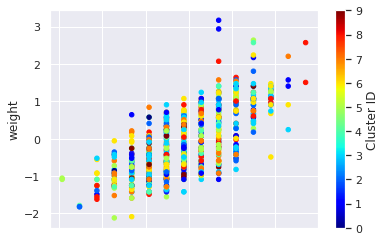

In [99]:
y_train = y_pred
labels1 = pd.DataFrame(kmeans.labels_,columns=['Cluster ID'])
result1 = pd.concat((X,labels1), axis=1)
result1.plot.scatter(x='height',y='weight',c='Cluster ID',colormap='jet')

<AxesSubplot:xlabel='height', ylabel='weight'>

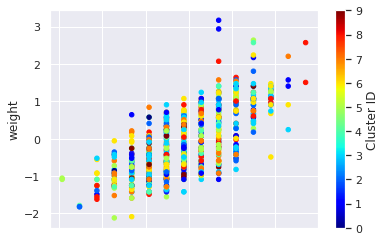

In [100]:
result1.plot.scatter(x='height',y='weight',c='Cluster ID',colormap='jet')


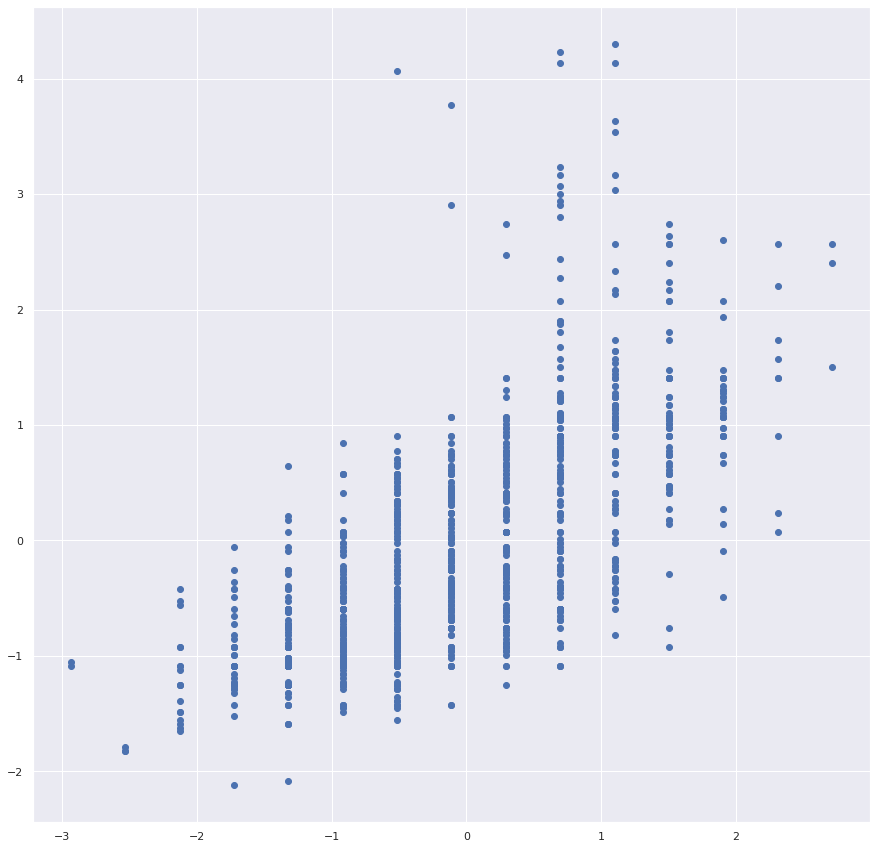

In [325]:
import matplotlib.pyplot as plt

plt.scatter(X['height'], X['weight'])

## DBSCAN

<AxesSubplot:xlabel='height', ylabel='weight'>

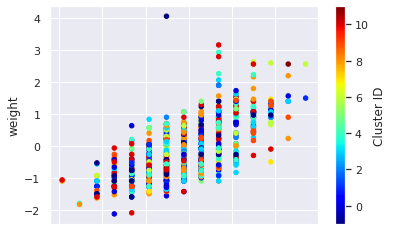

In [107]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=.4).fit(X)
labels1 = pd.DataFrame(db.labels_,columns=['Cluster ID'])
result1 = pd.concat((X,labels1), axis=1)
result1.plot.scatter(x='height',y='weight',c='Cluster ID',colormap='jet')

## Classifying Players

Seeing as clustering players clearly didn't work, we tried to classify the players into their positions instead. First we did so with only weight and height, but then we also appended NFL combine information.

In [108]:
pd.unique(hw_filtered['position'])


array(['CB', 'SS', 'MLB', 'OLB', 'FS', 'QB', 'TE', 'WR', 'DE', 'RB', 'LB',
       'FB', 'ILB', 'DB', 'S', 'HB', 'NT', 'P', 'LS', 'K', 'DT'],
      dtype=object)

In [109]:
df = hw_filtered
df = df[df['position'].isin(['RB','TE','WR','QB'])]

,height,weight,position
8,1.91,0.67,QB
9,1.50,0.91,TE
11,-0.51,-0.82,WR
12,-2.13,-1.09,WR
14,-2.94,-1.09,RB
...,...,...,...
1279,1.10,0.97,TE
1284,1.10,0.24,QB
1285,-0.51,0.24,RB
1294,-0.51,-1.42,WR


In [110]:
X = df.drop(columns=['position'])
y = df['position'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [115]:
dt = DecisionTreeClassifier(max_depth = 1, max_features=None)
dt.fit(X_train, y_train)

# dt = DecisionTreeClassifier()
# params = {
#     'max_depth': list(range(1, 10)),
#     'max_features': [60, 100, 120, 'log2', None]
# }
# clf = GridSearchCV(dt, params)
# clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1)

In [112]:
y_pred = clf.predict(X_test)
print_scores(y_pred, y_test)

Summary
------------------------------
Accuracy: 0.8
Precision: 0.8317460317460318
Recall: 0.8
F1-Score: 0.791991991991992


In [396]:
clf.best_params_

{'max_depth': 4, 'max_features': None}

## With Combine Stats

In [120]:
nfl_data = pd.read_csv('data/combine.csv')
nfl_data.describe(include='all')



,url,pick,team,year,pos,player,college,missing_combine_vals,height_inches,weight,forty,vertical,bench,broad,threecone,shuttle,defense.ast.tackles,defense.fum.forced,defense.fum.rec,defense.fum.tds,defense.fum.yds,defense.games,defense.int,defense.int.td,defense.int.yards,defense.loss.tackles,defense.pd,defense.sacks,defense.seasons,defense.solo.tackes,defense.tackles,passing.attempts,passing.comp.pct,passing.completions,passing.games,passing.pass.ints,passing.pass.tds,passing.pass.yards,passing.seasons,receiving.games,receiving.rec.td,receiving.rec.yards,receiving.receptions,receiving.rush.att,receiving.rush.td,receiving.rush.yds,receiving.scrim.plays,receiving.scrim.tds,receiving.scrim.yds,receiving.seasons,rushing.games,rushing.rec.td,rushing.rec.yards,rushing.receptions,rushing.rush.att,rushing.rush.td,rushing.rush.yds,rushing.scrim.plays,rushing.scrim.tds,rushing.scrim.yds,rushing.seasons,num_murders,purple.drank.incidents
count,4419,4162.00,2832,4419.00,4419,4419,4419,4419.00,4419.00,4419.00,4318.00,3506.00,3023.00,3482.00,2866.00,2914.00,4419.00,4419.00,4419.00,4419.00,4419.00,4419.00,4419.00,4419.00,4419.00,4419.00,4419.00,4419.00,4419.00,4419.00,4419.00,4419,4419.00,4419,4419.00,4419.00,4419.00,4419,4419.00,4419.00,4419.00,4419,4419.00,4419.00,4419.00,4419,4419.00,4419.00,4419,4419.00,4419.00,4419.00,4419,4419.00,4419,4419.00,4419,4419,4419.00,4419,4419.00,4.42e+03,4.42e+03
unique,4404,NaN,34,NaN,23,4347,179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,285,NaN,266,NaN,NaN,NaN,314,NaN,NaN,NaN,903,NaN,NaN,NaN,253,NaN,NaN,914,NaN,NaN,NaN,446,NaN,432,NaN,541,435,NaN,547,NaN,NaN,NaN
top,https://www.sports-reference.com/cfb/players/j...,NaN,SFO,NaN,WR,Chris Brown,Southern California,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,0,NaN,NaN,NaN,0,NaN,0,NaN,0,0,NaN,0,NaN,NaN,NaN
freq,2,NaN,109,NaN,741,4,112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4103,NaN,4103,NaN,NaN,NaN,4103,NaN,NaN,NaN,3366,NaN,NaN,NaN,3733,NaN,NaN,3366,NaN,NaN,NaN,3843,NaN,3834,NaN,3835,3834,NaN,3835,NaN,NaN,NaN
mean,NaN,171.04,NaN,2009.93,NaN,NaN,NaN,1.45,73.46,235.52,4.71,33.35,20.34,115.55,7.18,4.34,24.09,0.65,0.30,0.08,2.70,17.17,1.66,0.19,23.48,6.90,2.17,2.75,1.55,35.93,60.02,NaN,15.43,NaN,2.77,1.96,4.19,NaN,0.26,9.32,3.36,NaN,29.65,2.24,0.12,NaN,31.89,3.48,NaN,0.83,5.12,0.37,NaN,6.58,NaN,3.04,NaN,NaN,3.41,NaN,0.47,3.39e-03,3.39e-03
std,NaN,105.85,NaN,5.15,NaN,NaN,NaN,1.77,2.55,39.79,0.26,3.99,6.30,8.37,0.35,0.23,37.96,1.52,0.95,0.31,11.91,19.54,3.15,0.57,53.09,11.57,5.03,5.69,1.74,53.82,89.41,NaN,57.02,NaN,10.27,7.75,16.70,NaN,0.97,17.30,7.35,NaN,61.87,10.06,0.78,NaN,67.32,7.61,NaN,1.53,13.52,1.44,NaN,21.24,NaN,9.28,NaN,NaN,10.24,NaN,1.23,1.98e-01,1.68e-01
min,NaN,1.00,NaN,2000.00,NaN,NaN,NaN,0.00,65.00,149.00,4.22,19.00,2.00,74.00,6.28,3.73,0.00,0.00,0.00,0.00,-1.00,0.00,0.00,0.00,-25.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,0.00,NaN,0.00,0.00,0.00,NaN,0.00,0.00,0.00,NaN,0.00,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,0.00,NaN,0.00,NaN,0.00,NaN,NaN,0.00,NaN,0.00,0.00e+00,0.00e+00
25%,NaN,75.00,NaN,2006.00,NaN,NaN,NaN,0.00,72.00,204.00,4.52,31.00,16.00,111.00,6.94,4.18,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,0.00,NaN,0.00,0.00,0.00,NaN,0.00,0.00,0.00,NaN,0.00,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,0.00,NaN,0.00,NaN,0.00,NaN,NaN,0.00,NaN,0.00,0.00e+00,0.00e+00
50%,NaN,161.00,NaN,2010.00,NaN,NaN,NaN,1.00,73.00,227.00,4.65,33.50,20.00,116.00,7.12,4.31,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,0.00,NaN,0.00,0.00,0.00,NaN,0.00,0.00,0.00,NaN,0.00,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,0.00,NaN,0.00,NaN,0.00,NaN,NaN,0.00,NaN,0.00,0.00e+00,0.00e+00
75%,NaN,300.00,NaN,2014.00,NaN,NaN,NaN,2.50,75.00,257.00,4.85,36.00,24.00,121.00,7.37,4.47,43.00,0.00,0.00,0.00,0.00,36.00,2.00,0.00,18.00,

In [130]:
df = nfl_data
df.isnull().sum()

url                          0
pick                       257
team                      1587
year                         0
pos                          0
                          ... 
rushing.scrim.tds            0
rushing.scrim.yds            0
rushing.seasons              0
num_murders                  0
purple.drank.incidents       0
Length: 63, dtype: int64

In [132]:
df = nfl_data[['pos','height_inches','weight','forty','vertical','bench','broad',
               'threecone','shuttle']]

df.info()

# df['forty'].fillna(df[df['pos'] == ])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4419 entries, 0 to 4418
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pos            4419 non-null   object 
 1   height_inches  4419 non-null   int64  
 2   weight         4419 non-null   int64  
 3   forty          4318 non-null   float64
 4   vertical       3506 non-null   float64
 5   bench          3023 non-null   float64
 6   broad          3482 non-null   float64
 7   threecone      2866 non-null   float64
 8   shuttle        2914 non-null   float64
dtypes: float64(6), int64(2), object(1)
memory usage: 310.8+ KB


In [133]:
df = df.dropna()
df = df[df['pos'].isin(['RB','TE','WR','QB'])]
df.isnull().sum()

pos              0
height_inches    0
weight           0
forty            0
vertical         0
bench            0
broad            0
threecone        0
shuttle          0
dtype: int64

In [140]:
df['pos'].value_counts()

WR    237
RB    214
TE    170
QB     10
Name: pos, dtype: int64

In [135]:
X = df.drop(columns=['pos'])
y = df['pos'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [136]:
# dt = DecisionTreeClassifier(max_depth = 1, max_features=None)
# dt.fit(X_train, y_train)

dt = DecisionTreeClassifier()
params = {
    'max_depth': list(range(1, 10)),
    'max_features': [60, 100, 120, 'log2', None]
}
clf = GridSearchCV(dt, params)
clf.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': [60, 100, 120, 'log2', None]})

In [137]:
y_pred = clf.predict(X_test)
print_scores(y_pred, y_test)

Summary
------------------------------
Accuracy: 0.875
Precision: 0.8760653409090909
Recall: 0.875
F1-Score: 0.869640261627907


In [138]:
clf.best_params_

{'max_depth': 7, 'max_features': None}